In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])

In [5]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [6]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [7]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [8]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),
          'Avg.cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg.cost = 0.1981
Epoch: 0002 Avg.cost = 0.0595
Epoch: 0003 Avg.cost = 0.0482
Epoch: 0004 Avg.cost = 0.0414
Epoch: 0005 Avg.cost = 0.0391
Epoch: 0006 Avg.cost = 0.0374
Epoch: 0007 Avg.cost = 0.0358
Epoch: 0008 Avg.cost = 0.0351
Epoch: 0009 Avg.cost = 0.0346
Epoch: 0010 Avg.cost = 0.0341
Epoch: 0011 Avg.cost = 0.0337
Epoch: 0012 Avg.cost = 0.0334
Epoch: 0013 Avg.cost = 0.0321
Epoch: 0014 Avg.cost = 0.0313
Epoch: 0015 Avg.cost = 0.0310
Epoch: 0016 Avg.cost = 0.0309
Epoch: 0017 Avg.cost = 0.0298
Epoch: 0018 Avg.cost = 0.0294
Epoch: 0019 Avg.cost = 0.0292
Epoch: 0020 Avg.cost = 0.0289
최적화 완료!


In [10]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

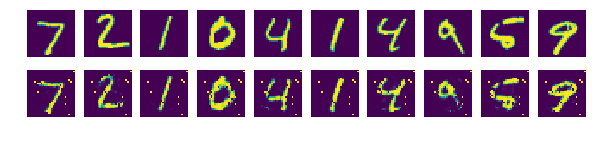

In [11]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
    
plt.show()